# Data Preparation

The data will be prepared as follows.

 * each image is a tensor $227\times227\times3$
 * for each color channel, are centered:
   $$
   px_{i,j} = \dfrac{px_{i,j} - (255.0/2.0)}{255.0}
   $$
 * all data will go in a tensor $N\times227\times227\times3$
 
 

In [21]:
# Importing libraries
from __future__ import print_function

import numpy as np
import os
from glob import glob
import random

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image
from scipy import ndimage

from six.moves import cPickle as pickle

# Al dataset are relative to the position of this file
DATASET_DIR = os.path.join(os.getcwd(), 'dataset/data')

CONFIG = {
    "ext": "png",
    "width": 227,
    "height": 227,
    "depth": 3,
    "pixel_depth": 255.0,
    "verbose": True,
    "batches": 1000,
    "output": "data.pickle"
}

In [23]:
class DataPreparator:
    # Initialize the DataPreparator class, that inspects all
    # the files.
    # Requires a path and a configuration object
    def __init__(self, img_path, config):
        self.data_path          = img_path
        self.file_list          = glob(self.data_path + '/*.' + config["ext"])
        self.file_list          = [os.path.join(self.data_path, f) for f in self.file_list]
        self.shuffled_file_list = random.sample(self.file_list, len(self.file_list))
        self.batch_lists        = []
        
        self.data_size          = 0
        self.width              = config["width"]
        self.height             = config["height"]
        self.depth              = config["depth"]
        self.pixel_depth        = config["pixel_depth"]
        self.verbose            = config["verbose"]
        self.batches_size       = config["batches"]
        self.batches            = 0
        self.output             = os.path.join(self.data_path, "..", config["output"])
        self.batches_generate()
        self.loadAllFiles()
        
    # Test printing some of the files that are in the directory
    # Requires an integer as input
    def testDirFiles(self, no):
        print("Now I show you some samples:")
        files = random.sample(self.shuffled_file_list, no)
        for f in files:
            print(f)
            display(Image(filename=f))
    
    def batches_generate(self):
        chunk            = []
        self.batch_lists = []
        for i in range(0, len(self.shuffled_file_list), self.batches_size):
            chunk = self.shuffled_file_list[i:i + self.batches_size]
            self.batch_lists.append(chunk)
        self.batches = len(self.batch_lists)
    
    # Given a file load the numpy Array, makes it
    # zero-mean and return the tensor.
    # Requires as input a file
    def loadFile(self, f):
        exp_shape = (self.height, self.width, self.depth)
        try:
            # PIXELS - (PIXEL_DEPTH/2)
            # ------------------------ = FinalArray
            #       PIXEL_DEPTH
            image = (ndimage.imread(f, mode='RGB') - self.pixel_depth/2.0) / self.pixel_depth
            if image.shape != exp_shape:
                raise Exception("Unexpected Image Shape: {}".format(image.shape))
            #if self.verbose:
                #print("File: %s :: mean = %.3f std = %.3f" % (os.path.basename(f), np.mean(image), np.std(image)))
            return image
        except IOError as e:
            print("Cannot read %s: %s. Skipping it!!" % (os.path.basename(f), e))
            return None
    
    def emptyBatchN(self, n):
        return np.ndarray(shape=(n, self.height, self.width,self.depth), dtype=np.float32)
    
    def emptyBatch(self):
        return self.emptyBatchN(self.batches_size)
    
    # Load all images files as it where different batches
    # unfortunately i cannot handle all files in a single object
    def loadAllFiles(self):
        try:
            with open(self.output, 'wb') as p:
                pickle.dump(self.batches, p, pickle.HIGHEST_PROTOCOL)
                for current_batch in self.batch_lists:
                    index = 0
                    binary = self.emptyBatch()
                    for f in current_batch:
                        image = self.loadFile(f)
                        if image is not None:
                            binary[index, :, :, :] = image
                            index += 1
                    saving_binary = self.emptyBatchN(index)
                    saving_binary = binary[:index, :, :, :]
                    pickle.dump(saving_binary, p, pickle.HIGHEST_PROTOCOL)
                    if self.verbose:
                            print("BATCH COMPLETE\nImages: %d\nMean: %.3f\nStd:  %.3f" % (index, np.mean(binary), np.std(binary)))
        except Exception as e:
            print("Unable to save data to %s : %s" % (self.output, e))
        if self.verbose:
            print("COMPLETED")

        
        
    
dataHandler = DataPreparator(DATASET_DIR, CONFIG)
# dataHandler.testFiles(3)

      

BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 1000
Mean: -0.345
Std:  0.217
BATCH COMPLETE
Images: 800
Mean: -0.276
Std:  0.238
COMPLETED


In [1]:
# dataHandler.testDirFiles(5)

In [24]:
def test_images(pick = "./dataset/data.pickle", no = 5):
    with open(pick, "rb") as f:
        datasets = pickle.load(f)
        print("Dataset size = %d" % datasets)
        first = pickle.load(f)
        samples = random.sample(range(0, 1000), no)
        for k, i in enumerate(samples):
            for j in range(0, 3):
                plt.subplot(no, 3, (3*k) + j +1)
                plt.contourf(np.array(range(1,228)), np.array(range(1,228)), first[i,:,:,j], cmap=plt.cm.bone)

Dataset size = 14


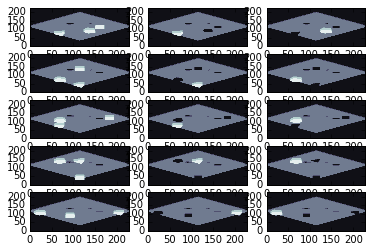

In [25]:
test_images()